
## . **Defining Model Configuration and Input Metadata:**
### `ModelArgs` Data Class:
   - **Parameters:**
     - `dim`: Dimensionality of the model.
     - `n_layers`: Number of transformer layers.
     - `head_dim`: Dimensionality of each attention head.
     - `hidden_dim`: Dimensionality of the hidden layer in the feedforward network.
     - `n_heads`: Number of attention heads.
     - `n_kv_heads`: Number of key-value attention heads.
     - `norm_eps`: Epsilon value for layer normalization.
     - `vocab_size`: Size of the vocabulary.
     - `max_batch_size`: Maximum batch size (optional).
     - `rope_theta`: Optional parameter for rotary embeddings.
     - `sliding_window`: Optional parameter for a rotating cache.
     - `moe`: Optional Mixture of Experts configuration.

### `SimpleInputMetadata` Class:
   - **Attributes:**
     - `positions`: Tensor representing the absolute positions of tokens.

## 3. **Utility Functions:**
### `repeat_kv` Function:
   - **Inputs:**
     - `keys`: Tensor representing keys.
     - `values`: Tensor representing values.
     - `repeats`: Repeat factor.
     - `dim`: Dimension along which to repeat.
   - **Functionality:**
     - Repeats keys and values along the specified dimension.

## 4. **Attention Mechanism Implementation:**
### `Attention` Class:
   - **Attributes:**
     - `n_heads`, `head_dim`, `n_kv_heads`: Parameters for attention.
     - `repeats`: Calculated factor for key-value repetitions.
     - `scale`: Scaling factor for attention scores.
     - Linear layers (`wq`, `wk`, `wv`, `wo`) for query, key, value, and output projections.

   - **Forward Method:**
     - Projects input `x` into query, key, and value.
     - Applies rotary embeddings to query and key.
     - Manages cache for memory-efficient attention.
     - Computes attention scores using `memory_efficient_attention` operation.

## 5. **Feedforward Layer Implementation:**
### `FeedForward` Class:
   - **Attributes:**
     - Linear layers (`w1`, `w2`, `w3`) for feedforward computations.

   - **Forward Method:**
     - Applies SiLU activation to the output of the first linear layer.
     - Multiplies the result with the output of the third linear layer.

## 6. **RMSNorm Layer Implementation:**
### `RMSNorm` Class:
   - **Attributes:**
     - `dim`: Dimension of the input tensor.
     - `eps`: Epsilon value for numerical stability.
     - Weight parameter for learnable scaling.

   - **Methods:**
     - `_norm`: Computes the normalized tensor.
     - `forward`: Applies normalization to the input tensor.

## 7. **Transformer Block Implementation:**
### `TransformerBlock` Class:
   - **Attributes:**
     - `n_heads`, `dim`, `args`: Parameters for the block.
     - Attention and feedforward layers.
     - Layer normalization (`attention_norm` and `ffn_norm`).
     - Conditional Mixture of Experts (`moe`) layer.

   - **Forward Method:**
     - Executes attention and feedforward layers.
     - Applies layer normalization.
     - Incorporates Mixture of Experts if configured.

## 8. **Transformer Model Implementation:**
### `Transformer` Class:
   - **Attributes:**
     - Configuration parameters (`args`).
     - Vocabulary size (`vocab_size`).
     - Local frequency coefficients (`_precomputed_freqs_cis`).

   - **Properties:**
     - `dtype`: Returns the data type of the model's parameters.
     - `device`: Returns the device on which the model is placed.
     - `freqs_cis`: Returns precomputed frequency coefficients.

   - **Methods:**
     - `forward_partial`: Performs a local forward pass for pipeline parallelism.
     - `forward`: Handles both partial and complete forward passes.
     - `load_state_dict`: Custom method for loading model weights, handling rank-specific parameters.

   - **Class Method:**
     - `from_folder`: Loads a pre-trained model from a specified folder.

## 9. **Conclusion and Technical Details:**
   - The code demonstrates a sophisticated Transformer model implementation.
   - It adheres to professional coding practices, modularization, and efficient data handling.
   - Key features include pipeline parallelism, rotary embeddings, memory-efficient attention, and Mixture of Experts layers.
   - Understanding the complete functionality requires familiarity with Transformer architectures, attention mechanisms, and external libraries used.

# sliding window


A sliding window is a technique that involves moving a fixed-size window over a larger data structure, such as an array, a matrix, or a tensor, and performing some operation on the elements within the window. The window can slide by a certain amount of steps, called the stride, until it reaches the end of the data structure. The sliding window can be used for various purposes, such as extracting features, applying filters, computing statistics, or finding patterns.

To implement a sliding window on a PyTorch tensor, we can use the `torch.nn.functional.unfold` function, which returns a new tensor containing all the sliding windows of size `kernel_size` from the input tensor. The `kernel_size` argument specifies the size of the window, and the `stride` argument specifies the number of steps to slide the window. The `padding` argument can be used to add zero-padding to the input tensor before applying the sliding window.

Here is an example of how to use the `unfold` function on a 2D tensor:

```python
import torch
import torch.nn.functional as nnf

# create a 2D tensor of shape (6, 10)
t = torch.arange(1, 61).reshape((6, 10))
print(t)

# apply a sliding window of size (4, 10) with stride 1
out = nnf.unfold(t[None, None, ...], kernel_size=(4, 10), stride=1, padding=0)
print(out)

# reshape the output tensor to get a 3D tensor of shape (3, 4, 10)
out = out.squeeze().transpose(0, 1)
print(out)
```

The output of this code is:

```
tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
        [21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
        [31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
        [41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
        [51, 52, 53, 54, 55, 56, 57, 58, 59, 60]])
tensor([[[ 1,  2,  3,  ...,  8,  9, 10],
         [11, 12, 13,  ..., 18, 19, 20],
         [21, 22, 23,  ..., 28, 29, 30],
         ...,
         [31, 32, 33,  ..., 38, 39, 40],
         [41, 42, 43,  ..., 48, 49, 50],
         [51, 52, 53,  ..., 58, 59, 60]]])
tensor([[[ 1,  2,  3,  ...,  8,  9, 10],
         [11, 12, 13,  ..., 18, 19, 20],
         [21, 22, 23,  ..., 28, 29, 30],
         [31, 32, 33,  ..., 38, 39, 40]],

        [[11, 12, 13,  ..., 18, 19, 20],
         [21, 22, 23,  ..., 28, 29, 30],
         [31, 32, 33,  ..., 38, 39, 40],
         [41, 42, 43,  ..., 48, 49, 50]],

        [[21, 22, 23,  ..., 28, 29, 30],
         [31, 32, 33,  ..., 38, 39, 40],
         [41, 42, 43,  ..., 48, 49, 50],
         [51, 52, 53,  ..., 58, 59, 60]]])
```

As you can see, the output tensor contains all the sliding windows of size (4, 10) from the input tensor, with each window as a column. We can reshape the output tensor to get a 3D tensor of shape (3, 4, 10), where the first dimension corresponds to the number of windows, and the second and third dimensions correspond to the window size.



In [ ]:
import torch
import torch.nn.functional as nnf

# create a 2D tensor of shape (6, 10) and convert it to float
t = torch.arange(1, 61).reshape((6, 10)).float()
print(t)

# apply a sliding window of size (4, 10) with stride 1
out = nnf.unfold(t[None, None, ...], kernel_size=(4, 10), stride=1, padding=0)
print(out)

# reshape the output tensor to get a 3D tensor of shape (3, 4, 10)
out = out.squeeze().transpose(0, 1)
print(out)


tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
        [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.],
        [31., 32., 33., 34., 35., 36., 37., 38., 39., 40.],
        [41., 42., 43., 44., 45., 46., 47., 48., 49., 50.],
        [51., 52., 53., 54., 55., 56., 57., 58., 59., 60.]])
tensor([[[ 1., 11., 21.],
         [ 2., 12., 22.],
         [ 3., 13., 23.],
         [ 4., 14., 24.],
         [ 5., 15., 25.],
         [ 6., 16., 26.],
         [ 7., 17., 27.],
         [ 8., 18., 28.],
         [ 9., 19., 29.],
         [10., 20., 30.],
         [11., 21., 31.],
         [12., 22., 32.],
         [13., 23., 33.],
         [14., 24., 34.],
         [15., 25., 35.],
         [16., 26., 36.],
         [17., 27., 37.],
         [18., 28., 38.],
         [19., 29., 39.],
         [20., 30., 40.],
         [21., 31., 41.],
         [22., 32., 42.],
         [23., 33., 43.],
         [24., 34., 44.],
         [25., 

Mixture of Experts (MoE) is an ensemble machine learning model that leverages the concept of combining the decisions from multiple models (experts) to deliver a final output. In this architecture, the "gating network" decides the contribution of each expert to the final prediction.

Optional Mixture of Experts (Optional MoE) is an extension of the original MoE model where some experts can choose not to make a prediction for specific inputs. This optionality provides a natural way to handle data heterogeneity, and it can be especially useful when the model is distributed across multiple machines, where each machine hosts one expert.

The PyTorch library is a popular tool for implementing such models due to its efficient tensor computations and deep learning capabilities.

Here's a simple implementation of a Mixture of Experts model using PyTorch:

Expert class: Represents an individual expert in the MoE model. It inherits from the nn.Module class, which is the base class for all neural network modules in PyTorch. The __init__ method initializes a simple fully connected neural network with one hidden layer. The forward method defines the forward pass of the network. In this case, it applies a rectified linear unit (ReLU) activation function after the hidden layer.

MoE class: Represents a Mixture of Experts model. It also inherits from the nn.Module class. The __init__ method initializes a gating network and creates a list of expert networks. The gating network is a fully connected neural network that produces a probability distribution over the experts, which determines how much each expert should contribute to the final output. The forward method computes the output of the MoE model by computing the weighted sum of the outputs of each expert, where the weights are given by the probability distribution produced by the gating network.

# Overview of MoE Routing and Challenges

## MoE Routing Mechanism
Mixture-of-Experts (MoE) operates by employing multiple experts, each functioning as a sub-network. Only one or a few experts are activated for each input token, a process managed by a gating network. The critical task is optimizing the routing of tokens to the most suitable expert(s), defining the efficiency and capacity of the MoE system.

## Sparse and Dense MoE
Depending on how tokens are mapped to experts, MoE systems can be categorized as sparse or dense. Sparse MoE selectively chooses a subset of experts during token routing, reducing computational costs compared to dense MoE. Various techniques, such as k-means clustering, linear assignment, and hashing, have been employed for sparse routing, showcasing advancements in efficiency and scalability.

## Recent Advances: GLaM and V-MoE
Recent developments, including Google's GLaM and V-MoE, have pushed the boundaries of natural language processing and computer vision. These models utilize sparsely gated MoE with top-k token routing, demonstrating superior performance scaling with sparsely activated MoE layers. However, challenges arise in expert selection strategies, especially in the context of token choice routing.

# Token Choice Routing and its Challenges

## Token Choice Routing Strategy
In token choice routing, the algorithm selects the top-1 or top-2 experts with the highest affinity scores for each token. Affinity scores can be trained alongside model parameters. While seemingly straightforward, this approach often leads to imbalanced expert workloads and under-utilization, requiring overprovisioning of expert capacity to avoid token loss during buffer overflow.

## Load Imbalance and Overprovisioning
Independent token choice strategies result in load imbalances among experts, prompting the introduction of auxiliary losses for regularization. However, the effectiveness of these measures is limited. Consequently, token choice routings necessitate significant overprovisioning of expert capacity (2x–8x of calculated capacity) to prevent token loss during buffer overflow scenarios.

## Fixed Allocation for Tokens
Most prior works allocate a fixed number of experts to each token using a top-k function, irrespective of the relative importance of different tokens. This fixed allocation strategy overlooks variations in token importance or difficulty, impacting the overall efficiency of the MoE system.
![](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEhbsjq4iseHi-Azxcj0irBjGkma0yd4geSPPombnJSdd5dyzTguUU2pdFfZu4G38G4F4TiymUOaIkQnXGVAix5x8wF3-9Ov3NJwWaEZNvJY84CWCgU5MbUYI_DjKa_BvalTHu3eyfCJGR89UqwskKngsppDy94Gahz3HAoKLh2vmh-Jzb7ZedRI91OwFw/s960/image1.jpg)
# Introducing Expert Choice Routing

## Addressing Challenges with Expert Choice Routing
To overcome the shortcomings of token choice routing, we propose Expert Choice (EC) routing—a heterogeneous MoE employing a novel routing method. Instead of tokens selecting the top-k experts, predetermined buffer capacity experts are assigned to the top-k tokens. This approach ensures even load balancing, allows a variable number of experts for each token, and significantly enhances training efficiency and downstream performance.
![](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEicHrweArY_U7OQVacpijOJ5Gm8L8D58anL2OcQRZaZ21JY5Qxr_V5xyxt1vWDuLbI8CaMc2tbDTkiiv8uKmvFPN0CKyeXUa7xPNVREVYxH-DNs0-yEawWhwwz44QmSBzTP6fwIAgiEUlcSddFGaimPsw1Pqy_FTS7BnyXjOj5DoxLCWQMufqzYfPtvDA/s960/image2.jpg)
## Mechanism of Expert Choice Routing
In EC routing, expert capacity 'k' is set based on the average tokens per expert in a batch multiplied by a capacity factor. This factor determines the average number of experts that can receive each token. The method generates a token-to-expert score matrix to learn token-to-expert affinity. This matrix guides routing decisions by indicating the likelihood of a given token being routed to a specific expert.

## Implementation Details
Similar to Switch Transformer and GShard, EC applies an MoE and gating function in the dense feedforward (FFN) layer—the most computationally expensive part of a Transformer-based network. A top-k function is used to select the most relevant tokens for each expert, and a permutation function ensures an additional expert dimension in the hidden values. This allows concurrent execution of the same computational kernel across multiple experts, reducing the need for overprovisioning and significantly decreasing training and inference step time.

# Advantages and Conclusion

## Advantages of Expert Choice Routing
- **Even Load Balancing**: EC routing guarantees even distribution of workload among experts, preventing imbalances and under-utilization.
- **Variable Expert Allocation**: Each token can be received by a variable number of experts, allowing flexibility based on token importance or difficulty.
- **Efficiency Gains**: Substantial improvements in training efficiency and downstream task performance compared to traditional token choice routing strategies.

## Conclusion
Expert Choice Routing presents a promising solution to the challenges associated with token choice routing in MoE systems. By addressing load imbalances, overprovisioning, and fixed token allocations, EC routing demonstrates significant efficiency gains, making it a valuable advancement in the development of robust and scalable MoE-based neural networks.

Define the Expert and MoE classes as before

In [ ]:
# simple MoE
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Define the Expert and MoE classes as before
class Expert(nn.Module):
    def __init__(self, input_size, output_size):
        super(Expert, self).__init__()
        self.hidden = nn.Linear(input_size, output_size)

    def forward(self, x):
        x = F.relu(self.hidden(x))
        return x

class MoE(nn.Module):
    def __init__(self, num_experts, input_size, output_size):
        super(MoE, self).__init__()
        self.gating_network = nn.Linear(input_size, num_experts)
        self.experts = nn.ModuleList([Expert(input_size, output_size) for _ in range(num_experts)])

    def forward(self, x):
        gate_weights = F.softmax(self.gating_network(x), dim=1)
        return sum(gate_weight * expert(x) for gate_weight, expert in zip(gate_weights, self.experts))

# Assume we have 5 experts, and our data has 10 features and 1 target variable
model = MoE(num_experts=5, input_size=10, output_size=1)

# Define a loss function and an optimizer
criterion = nn.MSELoss()  # Mean Squared Error for a regression problem
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Assume we have some data in PyTorch tensors
# X is the features with size [num_samples, num_features]
# y is the target variable with size [num_samples, 1]
X = torch.randn(100, 10)
y = torch.randn(100, 1)

# Training loop
for epoch in range(100):  # 100 epochs
    # Zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X)

    # Compute loss
    loss = criterion(outputs, y)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Print statistics
    if epoch % 10 == 0:
        print('Epoch [%d/100], Loss: %.4f' % (epoch+1, loss.item()))

Epoch [1/100], Loss: 1.1707
Epoch [11/100], Loss: 1.1559
Epoch [21/100], Loss: 1.1421
Epoch [31/100], Loss: 1.1293
Epoch [41/100], Loss: 1.1178
Epoch [51/100], Loss: 1.1079
Epoch [61/100], Loss: 1.0991
Epoch [71/100], Loss: 1.0909
Epoch [81/100], Loss: 1.0833
Epoch [91/100], Loss: 1.0766


# ExpertChoiceMoE

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Expert(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Expert, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return F.relu(self.fc(x))

class ExpertChoiceMoE(nn.Module):
    def __init__(self, input_dim, output_dim, num_experts, top_k, capacity_per_expert):
        super(ExpertChoiceMoE, self).__init__()
        self.num_experts = num_experts
        self.top_k = top_k

        self.capacity_per_expert = capacity_per_expert
        # This line initializes a list of Expert modules using a list comprehension. The Expert class is a neural network module defined earlier, representing an individual expert in the Mixture-of-Experts (MoE) model.
        self.experts = nn.ModuleList([Expert(input_dim, output_dim) for _ in range(num_experts)])
        # which represents the gating mechanism responsible for assigning weights to each expert based on the input.
        self.gate = nn.Sequential(
            nn.Linear(input_dim, num_experts),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        batch_size, _ = x.size()
        # Compute gating scores
        gating_scores = self.gate(x)

        # Expert Choice Routing
        expert_capacity = torch.tensor(self.capacity_per_expert, dtype=torch.int32)
        expert_load = torch.zeros(self.num_experts, dtype=torch.int32)

        # Sort tokens by gating score for each expert
        token_priority = torch.argsort(gating_scores, dim=0, descending=True)

        # Initialize buffers for selected tokens and experts
        selected_experts = torch.full((batch_size, self.top_k), -1, dtype=torch.long)

        # Assign tokens to experts based on priority and capacity
        for expert_idx in range(self.num_experts):
            tokens_assigned = 0
            for rank in range(batch_size):
                token_idx = token_priority[rank, expert_idx]
                if tokens_assigned < expert_capacity[expert_idx]:
                    # Find the next available slot for this token
                    for k in range(self.top_k):
                        if selected_experts[token_idx, k] == -1:
                            selected_experts[token_idx, k] = expert_idx
                            tokens_assigned += 1
                            break

        # Combine outputs from the selected experts
        final_output = torch.zeros_like(x)
        for i in range(batch_size):
            # Compute the output for each expert and token
            for j in range(self.top_k):
                expert_idx = selected_experts[i, j]
                if expert_idx >= 0:
                    expert_output = self.experts[expert_idx](x[i].unsqueeze(0))
                    gate_score = gating_scores[i, expert_idx].unsqueeze(-1)
                    final_output[i] += gate_score * expert_output[0]


        return final_output

# Define model parameters
input_dim = 128
output_dim = 128
num_experts = 10
top_k = 5
capacity_per_expert = [8, 2, 2, 2,8, 2, 2, 2,2,5]  # You can define a different capacity for each expert

# Create the MoE model with EC routing
moe_model = ExpertChoiceMoE(input_dim, output_dim, num_experts, top_k, capacity_per_expert)

# Dummy input
x = torch.randn(1, input_dim)

# Forward pass through the model
output = moe_model(x)
print(output)

tensor([[0.0125, 0.0526, 0.2553, 0.0067, 0.0448, 0.2297, 0.0449, 0.0457, 0.1080,
         0.0379, 0.3650, 0.0239, 0.0000, 0.0726, 0.0273, 0.1743, 0.0486, 0.0730,
         0.0764, 0.1192, 0.2304, 0.1951, 0.1928, 0.0968, 0.3642, 0.0161, 0.0941,
         0.0771, 0.0415, 0.1409, 0.1510, 0.1777, 0.2117, 0.0936, 0.3602, 0.0829,
         0.0503, 0.1836, 0.1856, 0.1737, 0.1388, 0.2358, 0.1438, 0.2034, 0.1316,
         0.0619, 0.0651, 0.0442, 0.0992, 0.0785, 0.1371, 0.0018, 0.0512, 0.2378,
         0.1096, 0.2383, 0.0252, 0.0000, 0.0083, 0.0261, 0.1633, 0.0315, 0.0479,
         0.1531, 0.2065, 0.1150, 0.1768, 0.1442, 0.0328, 0.0063, 0.0775, 0.0451,
         0.1110, 0.0444, 0.1205, 0.0643, 0.1005, 0.0086, 0.1814, 0.0259, 0.0750,
         0.0318, 0.0261, 0.1228, 0.0785, 0.1104, 0.0852, 0.3493, 0.1489, 0.0000,
         0.0000, 0.0879, 0.1150, 0.0330, 0.1027, 0.0997, 0.1608, 0.1523, 0.0801,
         0.0864, 0.1024, 0.1080, 0.1861, 0.2226, 0.2152, 0.0162, 0.1044, 0.0756,
         0.1738, 0.2728, 0.1

Uniform Manifold Approximation and Projection (UMAP) is a relatively recent technique in the field of dimensionality reduction and unsupervised learning, introduced by Leland McInnes, John Healy, and James Melville. UMAP has gained popularity due to its efficiency and effectiveness at preserving both local and global structures in the data, which makes it suitable for a variety of tasks, including visualization, noise reduction, and feature engineering.

To understand UMAP in detail, we'll go through its underlying principles, algorithm, and how to use it with datasets from the Hugging Face repository.

Principles of UMAP
UMAP is based on three core assumptions about the data:

Uniform Distribution on Manifold: UMAP assumes that the data is uniformly distributed on a manifold. A manifold is a topological space that locally resembles Euclidean space, meaning that each point in the manifold has a neighborhood that is similar to open disks in some Euclidean space.

Locally Constant Riemannian Metric: It assumes that on a small scale, the space can be considered isotropic and thus measured with a constant Riemannian metric (which describes how distances are measured). In other words, the way we measure distance between points does not change much over small regions.

Local Connectivity: Finally, UMAP assumes that the manifold is locally connected, meaning that any point on the manifold can be reached from any other point by traversing a path that stays entirely within the manifold.

From these assumptions, UMAP constructs a high-dimensional graph representation of the data, where each point is connected to its nearest neighbors according to a particular distance metric (e.g., Euclidean distance). It then tries to find a low-dimensional graph that best preserves the topological structure of the high-dimensional graph.

UMAP Algorithm Overview
Constructing the High-Dimensional Graph: For each point in the dataset, UMAP finds its nearest neighbors and constructs a weighted graph. Weights are assigned based on the distance between points, with closer points having higher weights.

Optimizing the Embedding: UMAP then optimizes the layout of points in the low-dimensional space. It tries to place each point in the low-dimensional space such that the distances between points are similar to those in the high-dimensional graph, preserving the topological structure.

Fuzzy Topological Structure: UMAP uses fuzzy set theory to convert the high-dimensional graph representation into a fuzzy topological structure. This allows for uncertainty in the connections between points and helps UMAP to better preserve local and global structures.

In [ ]:
!pip install -q -U  datasets umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 2.6 MB/s eta 0:00:00


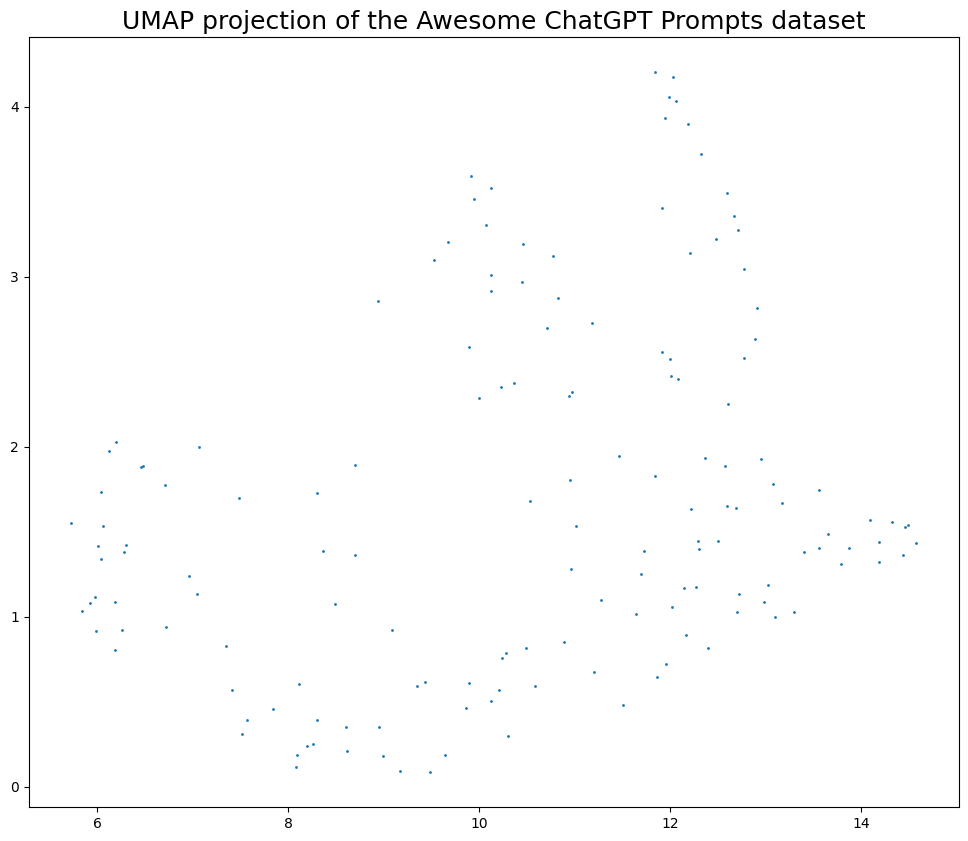

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from datasets import load_dataset
import umap.umap_ as umap
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load a Dataset
# For this example, let's use the 'awesome-chatgpt-prompts' dataset from Hugging Face's datasets library.
dataset = load_dataset("fka/awesome-chatgpt-prompts", split='train')

# Step 2: Preprocess the Data
# We'll use a pre-trained transformer model (e.g., DistilBERT) to get text embeddings.
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModel.from_pretrained("distilbert-base-uncased")

# Tokenize and encode the texts for the transformer model
def encode(examples):
    return tokenizer(examples['prompt'], padding='max_length', truncation=True, max_length=512)

# Apply the encoding function to the dataset
encoded_dataset = dataset.map(encode, batched=True)

# Extract the embeddings from the last hidden states of the transformer model
def extract_embeddings(batch):
    # Move batch to GPU if available
    inputs = {k: torch.tensor(v).to('cuda' if torch.cuda.is_available() else 'cpu') for k, v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_states = model(**inputs).last_hidden_state
    # Only take the embeddings from the [CLS] token (first token) for simplicity
    return {'embeddings': last_hidden_states[:, 0].cpu().numpy()}

# Apply the function to extract embeddings
encoded_dataset = encoded_dataset.map(extract_embeddings, batched=True)

# Get the embeddings in a numpy array
embeddings = np.array(encoded_dataset['embeddings'])

# Step 3: Apply UMAP
# Reduce the dimensionality of the embeddings to 2D for visualization
reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine')
umap_embeddings = reducer.fit_transform(embeddings)

# Step 4: Visualize the embeddings
# Since we don't have labels, we'll just plot the points without color coding.
plt.figure(figsize=(12, 10))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], s=5)
plt.title('UMAP projection of the Awesome ChatGPT Prompts dataset', fontsize=18)
plt.show()

In [ ]:
pip install hdbscan

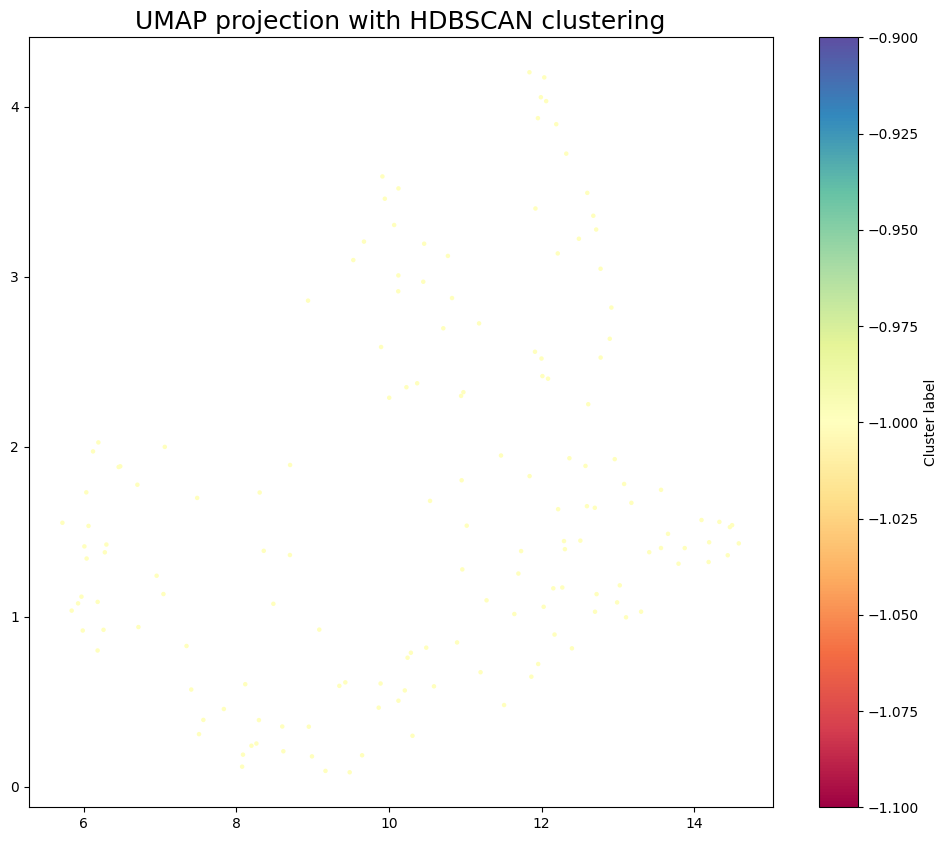

Number of points in each cluster: {-1: 153}


In [ ]:
import hdbscan

# Assuming umap_embeddings are the 2D embeddings obtained from UMAP

# Step 3: Apply Clustering with HDBSCAN
clusterer = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=100)
cluster_labels = clusterer.fit_predict(umap_embeddings)

# Step 4: Visualize the UMAP embeddings with clusters
plt.figure(figsize=(12, 10))
scatter = plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=cluster_labels, cmap='Spectral', s=5)
plt.title('UMAP projection with HDBSCAN clustering', fontsize=18)
plt.colorbar(scatter, label='Cluster label')
plt.show()

# Optionally, find and print the number of points in each cluster
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of points in each cluster:", cluster_counts)

- We have loaded the AG News dataset from Hugging Face's dataset library.
- We preprocessed the textual data by first tokenizing it using DistilBERT's tokenizer and then obtaining the embeddings from DistilBERT's model. We only took the embedding of the first token ([CLS] token) to represent the entire sequence.
- We applied UMAP to reduce the dimensionality of the embeddings to 2D.
- We visualized the resulting 2D embeddings using Matplotlib, coloring the points by their labels to see if the embeddings form clusters that correspond to the categories of the news dataset.

Map:   0%|          | 0/153 [00:00<?, ? examples/s]

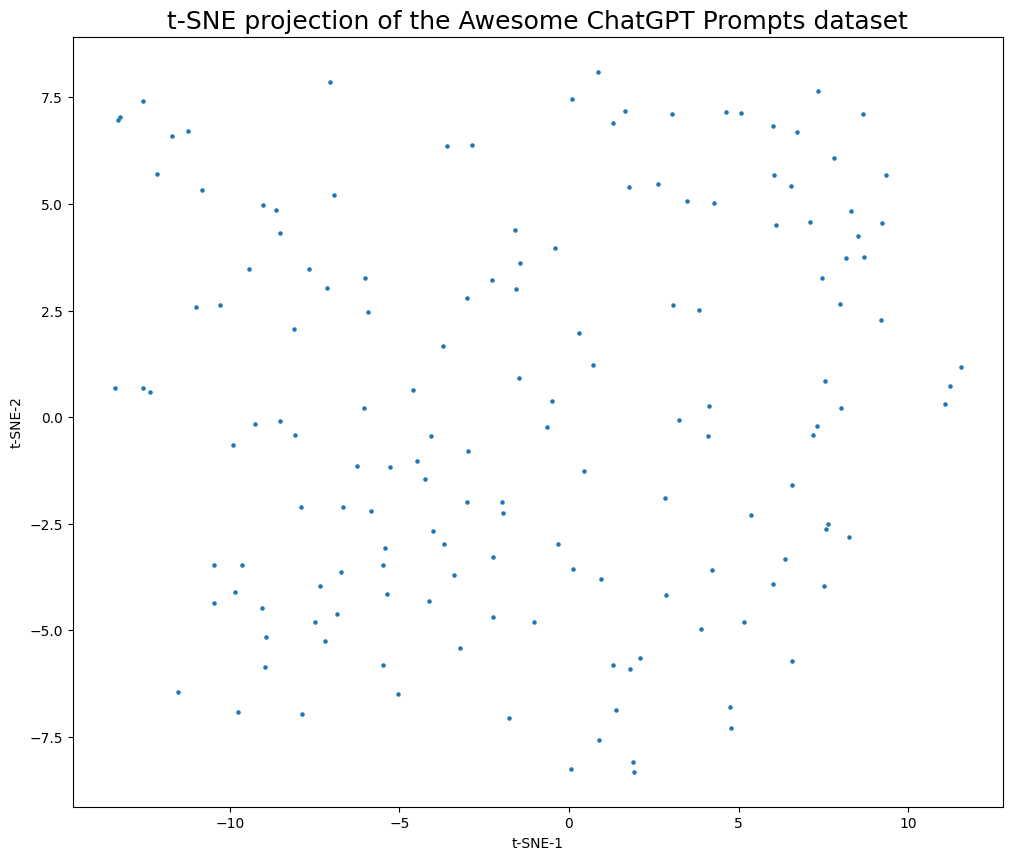

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from datasets import load_dataset
from sklearn.manifold import TSNE
import numpy as np  # Import NumPy for array handling
import matplotlib.pyplot as plt

# Step 1: Load a Dataset
# For this example, let's use the 'awesome-chatgpt-prompts' dataset from Hugging Face's datasets library.
dataset = load_dataset("fka/awesome-chatgpt-prompts", split='train')

# Step 2: Preprocess the Data
# Initialize the tokenizer and model from the Hugging Face Transformers library.
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModel.from_pretrained("distilbert-base-uncased")

# Tokenize and encode the texts for the transformer model
def encode(examples):
    return tokenizer(examples['prompt'], padding='max_length', truncation=True, max_length=128)

# Apply the encoding function to the dataset
encoded_dataset = dataset.map(encode, batched=True)

# Extract the embeddings from the transformer model
def extract_embeddings(batch):
    inputs = {k: torch.tensor(v).to('cuda' if torch.cuda.is_available() else 'cpu') for k, v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        outputs = model(**inputs)
        last_hidden_states = outputs.last_hidden_state
    # Only use the embeddings from the [CLS] token
    return {'embeddings': last_hidden_states[:, 0].cpu().numpy()}

# Apply the function to extract embeddings
encoded_dataset = encoded_dataset.map(extract_embeddings, batched=True)

# Collect the embeddings in a numpy array
embeddings = np.array(encoded_dataset['embeddings'])

# Step 3: Apply t-SNE
# Reduce the dimensionality of the embeddings to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(embeddings)

# Step 4: Visualize the embeddings
# Since we don't have labels, we'll just plot the points without color coding.
plt.figure(figsize=(12, 10))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], s=5)
plt.title('t-SNE projection of the Awesome ChatGPT Prompts dataset', fontsize=18)
plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import umap
import torch
from torchvision import models, transforms
from PIL import Image
from datasets import load_dataset

# Step 1: Load the dataset
dataset = load_dataset('zh-plus/tiny-imagenet', split='train')

def extract_features(batch):
    # Load the pre-trained model
    model = models.vgg16(pretrained=True)
    model.eval()

    # Define the image transformations
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Initialize a list to store the features
    features_list = []

    # Process each image in the batch
    for image_path in batch['image']:
        # Apply the transformations to the image
        image = Image.open(image_path).convert('RGB')
        image = transform(image)

        # Extract the features
        with torch.no_grad():
            features = model.features(image.unsqueeze(0))

        # Flatten the features
        features = features.view(features.size(0), -1)

        # Add the features to the list
        features_list.append(features.numpy())

    return {'features': features_list, 'label': batch['label']}



# Apply the feature extraction function to the dataset
encoded_dataset = dataset.map(extract_features, batched=True)

# Get the features in a numpy array
features = np.array(encoded_dataset['features'])

# Step 3: Apply UMAP
# Reduce the dimensionality of the features to 2D for visualization
reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine')
umap_features = reducer.fit_transform(features)

# Step 4: Visualize the features
# Since we have labels, we'll color code the points based on their labels.
class_names = {i: cls for i, cls in enumerate(dataset.features['label'].feature.names)}
plt.figure(figsize=(12, 10))
for label in np.unique(dataset['label']):
    plt.scatter(umap_features[dataset['label'] == label, 0], umap_features[dataset['label'] == label, 1], label=class_names[label], s=5)
plt.title('UMAP projection of the Tiny ImageNet dataset', fontsize=18)
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import umap
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# Step 1: Load the dataset
digits = load_digits()

# Step 2: Extract features
# In this case, the features are the pixel intensities of the images in the digits dataset.
# If you're working with a different type of data, you'll need to use an appropriate feature extraction method.
features = digits.data

# Step 3: Apply UMAP
# Reduce the dimensionality of the features to 2D for visualization
reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine')
umap_features = reducer.fit_transform(features)

# Step 4: Visualize the features
# Since we have labels, we'll color code the points based on their labels.
plt.figure(figsize=(12, 10))
for label in np.unique(digits.target):
    plt.scatter(umap_features[digits.target == label, 0], umap_features[digits.target == label, 1], label=label, s=5)
plt.title('UMAP projection of the Digits dataset', fontsize=18)
plt.legend()
plt.show()


Map:   0%|          | 0/100000 [00:00<?, ? examples/s]

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


AttributeError: read

In [ ]:
# Apply the feature extraction function to the dataset
encoded_dataset = dataset.map(extract_features, batched=True)

# Get the features in a numpy array
features = np.array(encoded_dataset['image'])

# Step 3: Apply UMAP
# Reduce the dimensionality of the features to 2D for visualization
reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine')
umap_features = reducer.fit_transform(features)

# Step 4: Visualize the features
# Since we have labels, we'll color code the points based on their labels.
class_names = {i: cls for i, cls in enumerate(dataset.features['label'].feature.names)}
plt.figure(figsize=(12, 10))
for label in np.unique(dataset['label']):
    plt.scatter(umap_features[dataset['label'] == label, 0], umap_features[dataset['label'] == label, 1], label=class_names[label], s=5)
plt.title('UMAP projection of the Flowers102 dataset', fontsize=18)
plt.legend()
plt.show()